<a href="https://colab.research.google.com/github/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/blob/main/Part_2_of_4_Going_Deeper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 of 4 - Going Deeper

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import Input

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

## Binary Classification

- A simple binary classification problem could be learning the boundaries to separate blue from red circles as shown in the images:

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/simple_binary.png'/>

- Dataset for this problem:

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/binary_dataset.png'/>

### Neural Network Architecture

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/nn_arch.png'/>

- The input layer has 2 neurons, one for the x coordinate and one for the y coordinate
- The hiddenm layer has 4 neurons. Four is a good enough number to learn the separation of classes in this dataset. This was found by experimentation
- The output layer has one neuron which makes use of the **sigmoid activation function**
    - Regardless of the activation functions used for the previous layers, we do need the sigmoid activation function for the last output node

### Sigmoid Function

$$
\sigma\left(z\right) = \frac{1}{1 + {e}^{-z}}
$$

- The sigmoid activation function squashes the neuron output to a floating point number between 0 and 1
- You can consider the output of the sigmoid funciton as the probability of a pair of coordinates being in one class or the other
- We can set a threshold and say everything below 0.5 will be a blue circle and everything above a red one

In [2]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

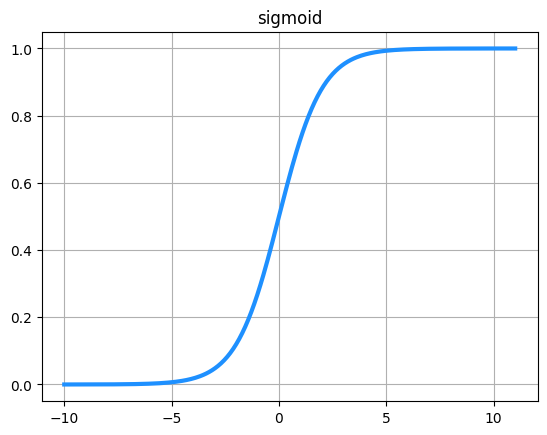

In [3]:
x = np.linspace(-10, 11, 300)

plt.plot(x, sigmoid(x), color='dodgerblue', linewidth=3)
plt.title('sigmoid')
plt.grid();

### Building the model

In [4]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from keras import Input

model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(4, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

### Compiling, training, predicting

- Since I don't have the actual data, this code is not inside a code cell

```python
# compile model
model.compile(optimizer='sgd',
              loss='binary_crossentropy')

# train model for 20 epochs
model.fit(coordinates, labels, epochs=20)

# predict with trained model
preds = model.predict(coordinates)
```

- The boundaries that were learned to classify circles

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/boundaries.png'/>

### Exploring Dollar Bills

In [5]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/'
file_path += 'DataCamp---Introduction-to-Deep-Learning-with-Keras/main/data/banknotes.csv'

banknotes = pd.read_csv(file_path)
banknotes.shape

(1372, 5)

In [6]:
banknotes.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


- `banknotes['class'] == 0`: real
- `banknotes['class'] == 1`: fake

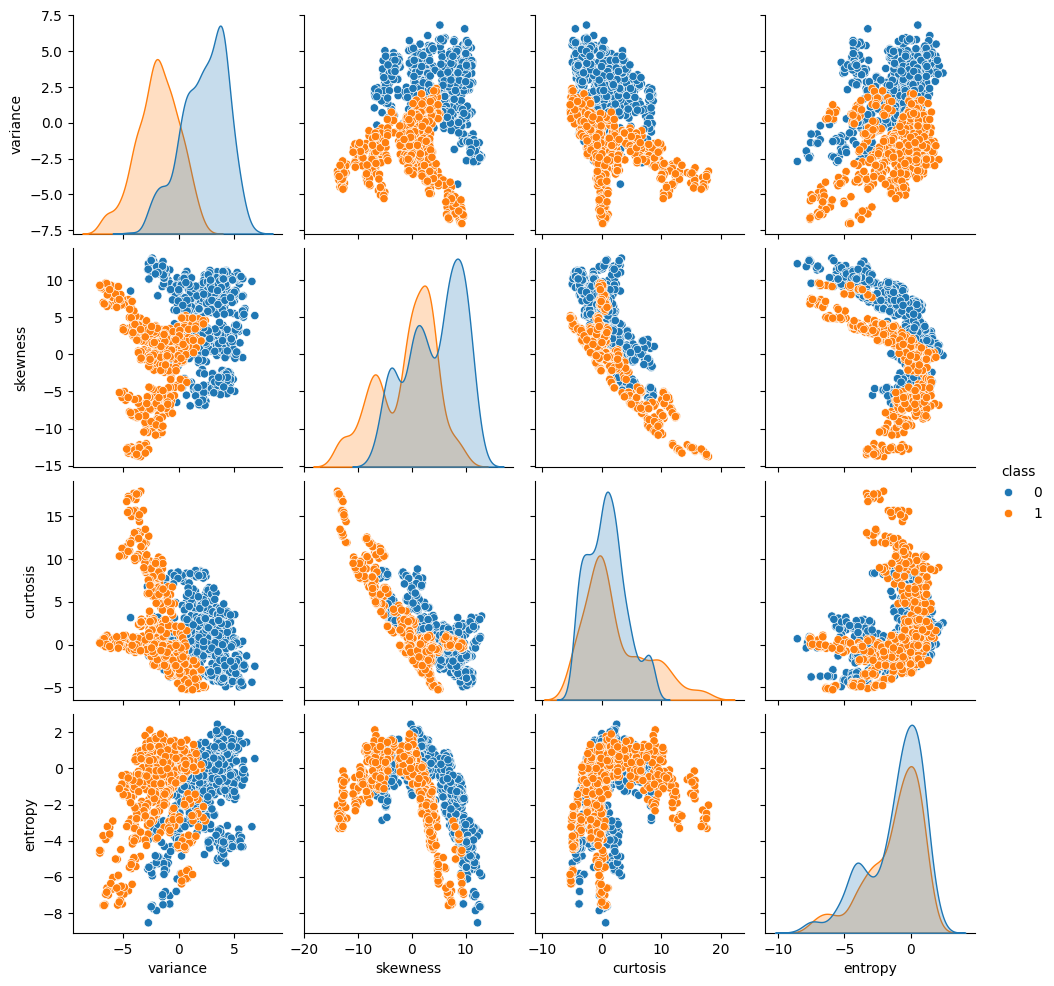

In [7]:
sns.pairplot(banknotes, hue='class')
plt.show()

In [8]:
banknotes.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
banknotes['class'].value_counts()

,count
class,
0,762
1,610


#### Build and compile the model

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/model_chapter2_binary_classification.jpeg'/>

In [10]:
# create a sequential model
model = Sequential()

# add a Dense layer that takes 4 neurons as imput
model.add(Input(shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

# compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# display summary of your model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

#### `train_test_split`

In [11]:
X = banknotes.drop('class', axis=1).values
y = banknotes['class'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, X_test.shape, y_test.shape

((960, 4), (412, 4), (960,), (412, 4), (412,))

#### Train and Evaluate your model

In [14]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.5185   
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8874 - loss: 0.3056 
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.2590 
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.2201 
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.1793 
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9257 - loss: 0.1665 
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.1686 
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.1486
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9227 - loss: 0.1512 
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9382 - loss: 0.1375 
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.1344 
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [15]:
accuracy = model.evaluate(X_test, y_test)
accuracy = accuracy[1]
accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9439 - loss: 0.1361  


0.9514563083648682

In [16]:
preds = model.predict(X_test).flatten()
preds = np.array(preds > 0.5, dtype=int)
# manual calcuation of accuracy
(preds == y_test).sum() / len(preds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9514563106796117

## Multi-class Classification

### The Data

In [17]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/'
file_path += 'DataCamp---Introduction-to-Deep-Learning-with-Keras/'
file_path += 'main/data/darts.csv'

darts = pd.read_csv(file_path)
darts

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve
...,...,...,...
795,0.320435,-0.327131,Kate
796,-0.179372,0.594201,Steve
797,0.530315,-0.833321,Michael
798,-0.287258,0.890928,Michael


In [18]:
darts['competitor'].value_counts()

,count
competitor,
Steve,200
Susan,200
Michael,200
Kate,200


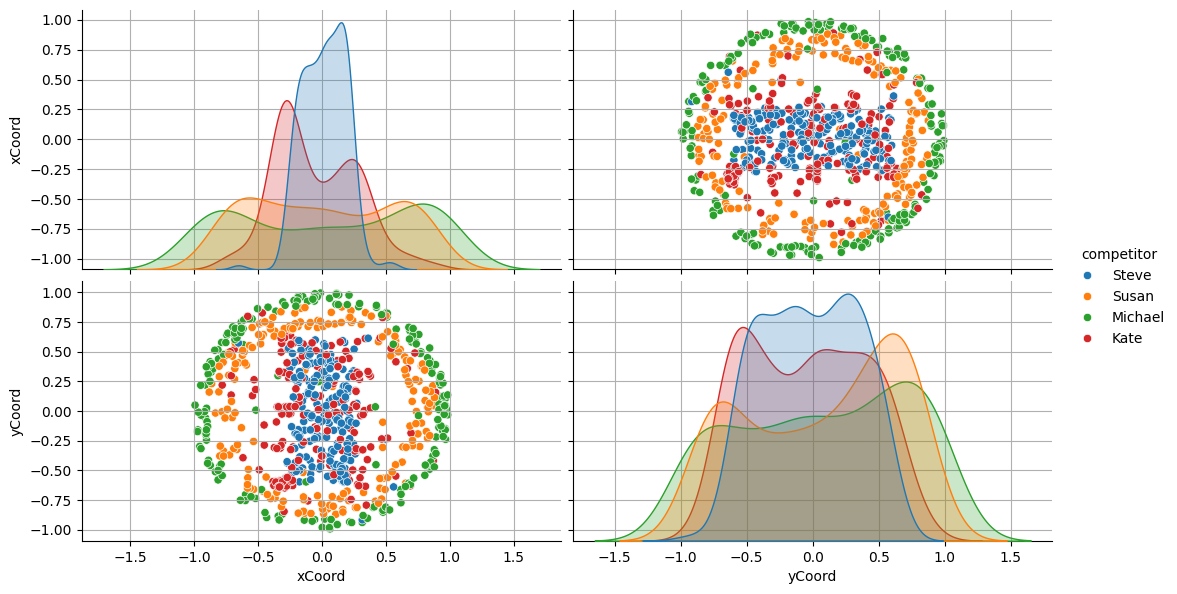

In [19]:
g = sns.pairplot(darts, hue='competitor', height=3, aspect=1.8)

for ax in g.axes.flatten():
    ax.grid();

### The Architecture

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/architecture.png'/>

#### The Output Layer

- There are 4 outputs, each linked to a possible competitor
- Each competitor has a probability of having thrown a given dart, so we must make sure the total sum of probabilities for the output neurons equals one
    - This is achieved with the **softmax activation function**
- Once we have a probabililty per output neura we chooses as our prediction the competitor whose associated output has the highest probability

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/output_layer.png'/>

### Prepare the dataset

- Since our outputs are vectors containing probabilities of each class, our neural network must also be traind with vectors representing this concept

In [20]:
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   xCoord      800 non-null    float64
 1   yCoord      800 non-null    float64
 2   competitor  800 non-null    object 
dtypes: float64(2), object(1)
memory usage: 18.9+ KB


In [21]:
darts.head(4)

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate


In [22]:
# from tensorflow.keras.utils import to_categorical

darts['competitor'] = pd.Categorical(darts['competitor'])
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   xCoord      800 non-null    float64 
 1   yCoord      800 non-null    float64 
 2   competitor  800 non-null    category
dtypes: category(1), float64(2)
memory usage: 13.6 KB


In [23]:
darts['competitor'] = darts['competitor'].cat.codes
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   xCoord      800 non-null    float64
 1   yCoord      800 non-null    float64
 2   competitor  800 non-null    int8   
dtypes: float64(2), int8(1)
memory usage: 13.4 KB


In [24]:
# It looks like the `cat.codes`
#. were assigned alpabetically
# I wonder if there is an easier
# way to keep track of the mapping between
# the old strings and the new cat.codes?
darts.head(4)

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0


In [25]:
coordinates = darts.drop('competitor', axis=1)
coordinates

,xCoord,yCoord
0,0.196451,-0.520341
1,0.476027,-0.306763
2,0.003175,-0.980736
3,0.294078,0.267566
4,-0.051120,0.598946
...,...,...
795,0.320435,-0.327131
796,-0.179372,0.594201
797,0.530315,-0.833321
798,-0.287258,0.890928


In [26]:
# turn the response variable into a one-hot response vector
competitors = to_categorical(darts['competitor'])
competitors[:4]

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

### Build the model

In [27]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

- When compiling the model, instead of using **binary cross-entropy** as we did before, we use **categorical cross-entropy** aka **log loss**
- categorical cross-entropy measures the difference between the predicted probabilities and the true label of the class we should have predicted

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/log_loss.png'/>

- When the true label is 1, we get high loss values for predicting 0, since we would be very wrong, and we get low loss values for predicting closer to 1

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [29]:
# first do a train_test_split
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates,
                                                                                competitors,
                                                                                train_size=0.8,
                                                                                random_state=42)

coord_train.shape, coord_test.shape, competitors_train.shape, competitors_test.shape

((640, 2), (160, 2), (640, 4), (160, 4))

In [30]:
coord_train

,xCoord,yCoord
264,-0.808071,0.438889
615,-0.000035,-0.379489
329,0.357529,-0.903861
342,0.965531,-0.148756
394,-0.708068,0.297342
...,...,...
71,0.223332,-0.146061
106,-0.797661,-0.378766
270,-0.560100,-0.650563
435,0.275985,0.326387


In [31]:
competitors_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [32]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3156 - loss: 1.3892
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3679 - loss: 1.3545 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 1.2967 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 1.2439 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 1.1059 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 0.9688 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6539 - loss: 0.8889 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.8380 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.8185 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.7749 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.7927 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [33]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

accuracy

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7831 - loss: 0.7023  


0.8062499761581421

In [34]:
pred_competitors = model.predict(coord_test)
pred_competitors[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[3.3941051e-01, 2.2807967e-02, 6.2878442e-01, 8.9970222e-03],
       [8.6259621e-04, 9.9455655e-01, 4.4960189e-03, 8.4760548e-05],
       [7.1901590e-01, 2.5063351e-02, 2.5293231e-01, 2.9882735e-03],
       [1.5968761e-01, 1.7155474e-02, 8.1363648e-01, 9.5203957e-03],
       [2.9611373e-01, 1.5705423e-02, 6.8497270e-01, 3.2081681e-03]],
      dtype=float32)

In [35]:
# accuracy manually
(pred_competitors.argmax(axis=1) == competitors_test.argmax(axis=1)).sum() / len(pred_competitors)

0.80625

### Softmax predictions

In [36]:
coords_small_test = pd.DataFrame({'xCoord': [0.209, 0.082, 0.198, -0.349, 0.215],
                                  'yCoord': [-0.077, -0.721, -0.675, 0.035, 0.184]})

coords_small_test

,xCoord,yCoord
0,0.209,-0.077
1,0.082,-0.721
2,0.198,-0.675
3,-0.349,0.035
4,0.215,0.184


In [37]:
competitors_small_test = np.array([[0., 0., 1., 0.],
                                   [0., 0., 0., 1.],
                                   [0., 0., 0., 1.],
                                   [1., 0., 0., 0.],
                                   [0., 0., 1., 0.]], dtype='float32')

competitors_small_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [38]:
preds = model.predict(coords_small_test)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[0.36473373, 0.01929056, 0.6089767 , 0.00699892],
       [0.19033435, 0.00667034, 0.04247339, 0.7605219 ],
       [0.4102007 , 0.01637727, 0.13337305, 0.44004908],
       [0.9239482 , 0.03005667, 0.04168161, 0.00431351],
       [0.48829827, 0.01766178, 0.48684466, 0.00719528]], dtype=float32)

In [39]:
# Print preds vs true values
print("{:45} | {} | {}".format('Raw Model Predictions','True labels', 'pred.argmax'))
for i, pred in enumerate(preds):
    print('{} | {} | {}'.format(pred, competitors_small_test[i], pred.argmax()))

Raw Model Predictions                         | True labels | pred.argmax
[0.36473373 0.01929056 0.6089767  0.00699892] | [0. 0. 1. 0.] | 2
[0.19033435 0.00667034 0.04247339 0.7605219 ] | [0. 0. 0. 1.] | 3
[0.4102007  0.01637727 0.13337305 0.44004908] | [0. 0. 0. 1.] | 3
[0.9239482  0.03005667 0.04168161 0.00431351] | [1. 0. 0. 0.] | 0
[0.48829827 0.01766178 0.48684466 0.00719528] | [0. 0. 1. 0.] | 0


In [40]:
# Extract the position of highest probability from each pred vector
preds_chosen = [pred.argmax() for pred in preds]
preds_chosen

[2, 3, 3, 0, 0]

In [41]:
# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i, pred in enumerate(preds_chosen):
    print('{:25} | {}'.format(pred, competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        0 | [0. 0. 1. 0.]


## Multi-label Classification